In [243]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import sklearn 

warnings.filterwarnings("ignore")


In [6]:
#load data
data = pd.read_csv("Weather-Data.csv")
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [12]:
#size of data
data.shape

(8784, 8)

In [14]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [16]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [20]:
#type of weather
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [22]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [28]:
data.Weather.nunique()

50

In [78]:
#converting weather 
x = "Thunderstorms, Moderate Rain Showers,Fog"

In [82]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [86]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [147]:
def create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if "Fog" in list1 and "Rain" in list1:
        return 'Rain+Fog'
    elif "Snow" in list1 and "Rain" in list1:
        return "Snow+rain"
    elif "Snow" in list1:
        return "Snow"
    elif "Rain" in list1:
        return "Rain"
    elif "Fog" in list1:
        return "Fog"
    elif "Clear" in list1:
        return "Clear"
    else:
        return "Cloudy"
    

In [149]:
create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [151]:
Get_Weather(create_list(x))

'Rain+Fog'

In [153]:
data['std_Weather'] = data['Weather'].apply(lambda x : Get_Weather(create_list(x)))

In [155]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Fog
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Fog


In [157]:
data.std_Weather.value_counts()

std_Weather
Cloudy       3866
Clear        3432
Snow          556
Rain          534
Fog           241
Rain+Fog      129
Snow+rain      26
Name: count, dtype: int64

In [159]:
#simple selection adn data balancing
cloudy_df = data[data["std_Weather"] == 'Cloudy'].sample(600)
cloudy_df.shape

(600, 9)

In [161]:
clear_df = data[data["std_Weather"] == 'Clear'].sample(600)
clear_df.shape

(600, 9)

In [163]:
#dataset balancing
rain_df = data[data['std_Weather'] == 'Rain']
snow_df = data[data['std_Weather'] == 'Snow']


In [165]:
rain_df.shape

(534, 9)

In [167]:
snow_df.shape

(556, 9)

In [171]:
#create nw weather dataset
weather_df = pd.concat([cloudy_df, clear_df, rain_df, snow_df], axis = 0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
4986,7/26/2012 18:00,21.6,16.5,73,11,24.1,99.89,Cloudy,Cloudy
6849,10/12/2012 9:00,5.4,-1.7,60,19,24.1,101.68,Mostly Cloudy,Cloudy
2363,4/8/2012 11:00,9.4,-3.6,40,15,48.3,100.46,Mostly Cloudy,Cloudy
8248,12/9/2012 16:00,-1.6,-5.2,76,4,24.1,102.31,Cloudy,Cloudy
7947,11/27/2012 3:00,-6.1,-8.5,83,7,25.0,102.03,Cloudy,Cloudy


In [173]:
weather_df.shape

(2290, 9)

In [175]:
weather_df.std_Weather.value_counts()

std_Weather
Cloudy    600
Clear     600
Snow      556
Rain      534
Name: count, dtype: int64

In [179]:
#drop columns date & weather
weather_df.drop(columns = ['Date/Time', 'Weather'], axis = 1, inplace = True)

In [181]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
4986,21.6,16.5,73,11,24.1,99.89,Cloudy
6849,5.4,-1.7,60,19,24.1,101.68,Cloudy
2363,9.4,-3.6,40,15,48.3,100.46,Cloudy
8248,-1.6,-5.2,76,4,24.1,102.31,Cloudy
7947,-6.1,-8.5,83,7,25.0,102.03,Cloudy


In [183]:
#duplicate records:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather


In [185]:
#null/missing value
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
std_Weather         0
dtype: int64

In [195]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,6.784017,1.535590,71.640175,16.686900,23.562358,100.813057
std,11.555810,10.641693,16.315499,9.210098,12.901613,0.917397
min,-22.200000,-27.800000,20.000000,0.000000,0.600000,97.520000
25%,-3.075000,-6.875000,61.000000,9.000000,16.100000,100.300000
50%,5.400000,0.300000,75.000000,17.000000,24.100000,100.840000
75%,17.000000,10.700000,84.000000,22.000000,25.000000,101.420000
max,32.500000,23.100000,99.000000,57.000000,48.300000,103.630000


In [203]:
cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

In [205]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.938687,-0.259477,-0.139526,0.402548,-0.086075
Dew Point Temp_C,0.938687,1.000000,0.082329,-0.130765,0.189267,-0.196702
Rel Hum_%,-0.259477,0.082329,1.000000,0.047648,-0.659433,-0.330268
Wind Speed_km/h,-0.139526,-0.130765,0.047648,1.000000,-0.166712,-0.412193
Visibility_km,0.402548,0.189267,-0.659433,-0.166712,1.000000,0.332043
Press_kPa,-0.086075,-0.196702,-0.330268,-0.412193,0.332043,1.000000


<Axes: >

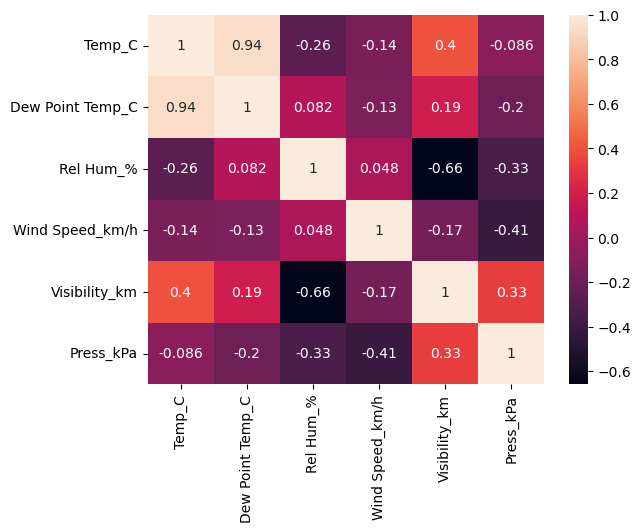

In [207]:
#heat map
sns.heatmap(cor_matrix, annot = True)

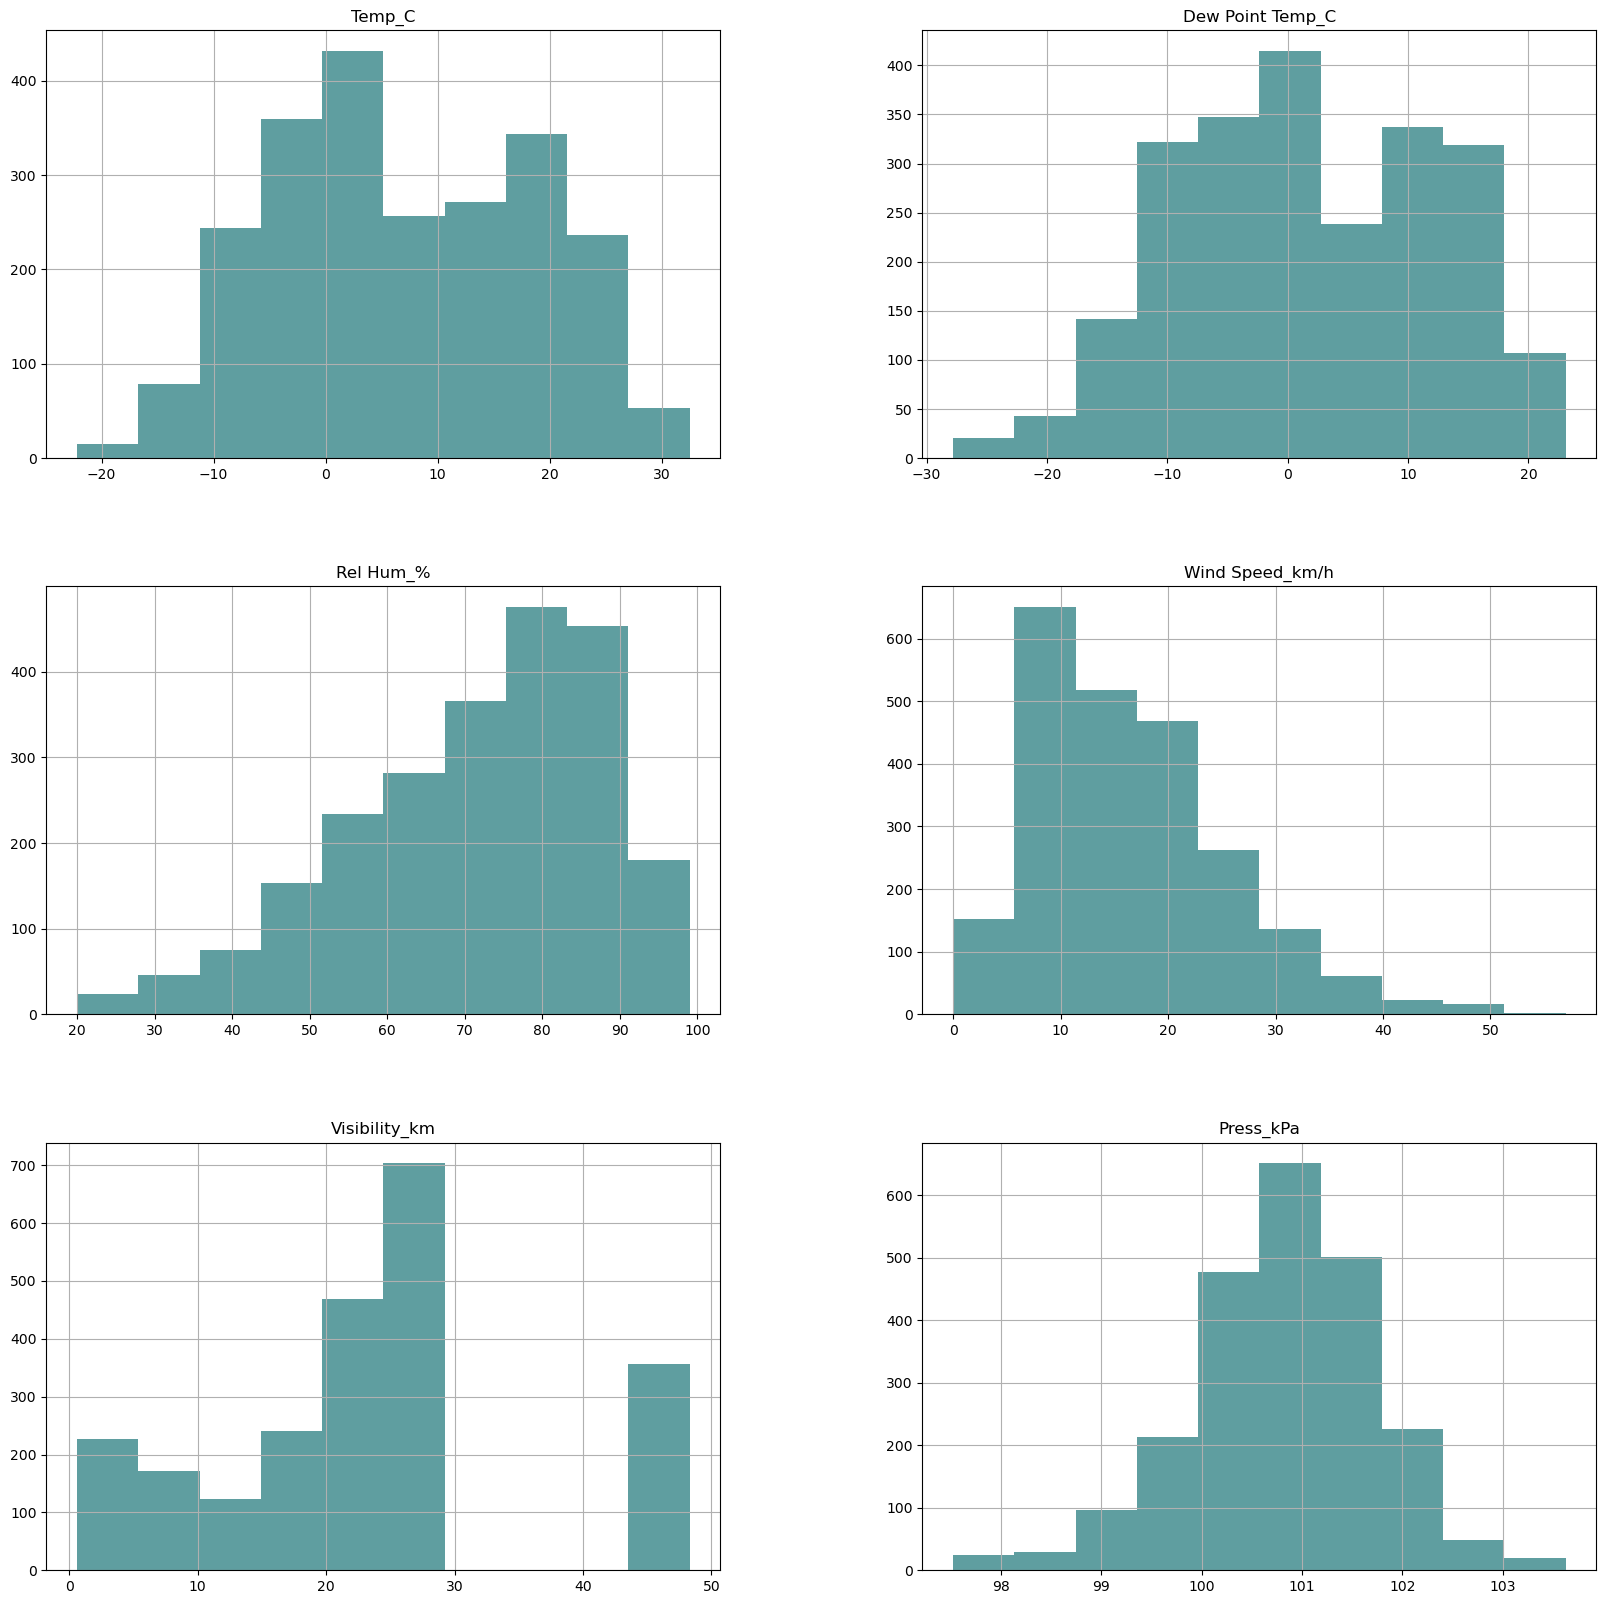

In [209]:
data_hist_plot = weather_df.hist(figsize = (20,20),color = '#5F9EA0')

In [211]:
num_cols = weather_df.select_dtypes(exclude = ['object']).columns.tolist()
num_cols

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

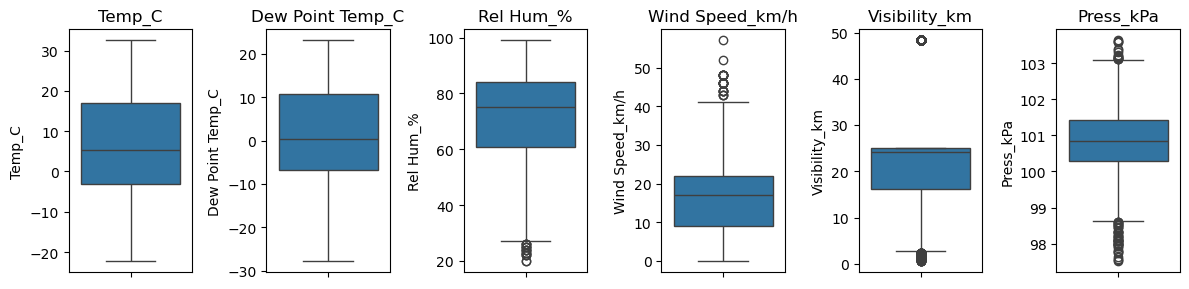

In [239]:
fig, axes = plt.subplots(ncols=6, figsize=(12, 3))
for column, axis in zip(num_cols, axes):  # Use "column" instead of "columns"
    sns.boxplot(data=weather_df[column], ax=axis)  # Corrected variable name
    axis.set_title(column)  # Set the title for each subplot
plt.tight_layout()
plt.show()


In [247]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()


In [255]:
weather_df['std_Weather'] = label_encoder.fit_transform(weather_df['std_Weather']) 

In [257]:
label_encoder.classes_

array(['Clear', 'Cloudy', 'Rain', 'Snow'], dtype=object)

In [261]:
cat_code = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
cat_code

{'Clear': 0, 'Cloudy': 1, 'Rain': 2, 'Snow': 3}

In [263]:
weather_df.std_Weather.value_counts()

std_Weather
1    600
0    600
3    556
2    534
Name: count, dtype: int64

In [281]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
4986,21.6,16.5,73,11,24.1,99.89,1
6849,5.4,-1.7,60,19,24.1,101.68,1
2363,9.4,-3.6,40,15,48.3,100.46,1
8248,-1.6,-5.2,76,4,24.1,102.31,1
7947,-6.1,-8.5,83,7,25.0,102.03,1


In [267]:
#X,y variables:
#independent variable
X = weather_df.drop(['std_Weather'], axis = 1)
#target variable:
y = weather_df['std_Weather']

In [273]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
std_scaler = StandardScaler()


In [283]:
X_std = std_scaler.fit_transform(X)
X_std

array([[ 1.28240412,  1.40651288,  0.08336382, -0.61759837,  0.04168156,
        -1.00638937],
       [-0.11979426, -0.30411477, -0.71359859,  0.25120315,  0.04168156,
         0.94520996],
       [ 0.22642756, -0.48269678, -1.93969462, -0.18319761,  1.91782564,
        -0.38493037],
       ...,
       [-0.63047145, -0.28531667,  1.30945985,  1.22860485, -1.45458211,
        -0.94097263],
       [-0.60450482, -0.31351383,  1.06424064,  1.22860485, -1.0747017 ,
        -0.98458379],
       [-0.58719372, -0.34171099,  0.88032624,  1.44580523, -0.95065911,
        -1.00638937]])

In [291]:
#spliiting data into trainning and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=42, stratify =y)
x_train.shape, x_test.shape

((1832, 6), (458, 6))

In [305]:
pip install -U scikit-learn


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
Note: you may need to restart the kernel to use updated packages.


In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # Fixed typo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier  # Fixed typo


In [325]:
#creating object for each model
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()  
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
NB = GaussianNB()


In [333]:
import warnings 
warnings.filterwarnings ('ignore')

from sklearn.model_selection import cross_val_score
models = [LR, DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features = X_std
labels = y
CV = 5
accu_list = [] #akurasi
ModelName = [] #model name list

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring = 'accuracy', cv = CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({'Model' : ModelName, 'Cross_Val_Accuracy' : accu_list})
model_acc_df
                                 
                                 


,Model,Cross_Val_Accuracy
0,LogisticRegression,59.781659
1,DecisionTreeClassifier,54.061135
2,RandomForestClassifier,61.572052
3,ExtraTreesClassifier,60.655022
4,SVC,59.388646
5,KNeighborsClassifier,54.890830
6,GradientBoostingClassifier,60.786026
7,AdaBoostClassifier,50.393013
8,GaussianNB,58.471616


In [337]:
model_acc_df.sort_values(by = ['Cross_Val_Accuracy'], ascending = False)

,Model,Cross_Val_Accuracy
2,RandomForestClassifier,61.572052
6,GradientBoostingClassifier,60.786026
3,ExtraTreesClassifier,60.655022
0,LogisticRegression,59.781659
4,SVC,59.388646
8,GaussianNB,58.471616
5,KNeighborsClassifier,54.890830
1,DecisionTreeClassifier,54.061135
7,AdaBoostClassifier,50.393013


In [339]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [351]:
#classification report
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       120
           1       0.47      0.38      0.42       120
           2       0.75      0.77      0.76       107
           3       0.78      0.90      0.84       111

    accuracy                           0.67       458
   macro avg       0.66      0.68      0.67       458
weighted avg       0.66      0.67      0.66       458



<Axes: >

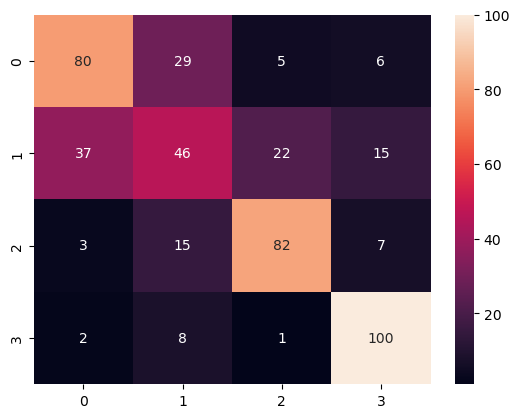

In [353]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = 'd')

In [355]:
#hyperparameter tunning :model tuning 
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt','log2'],
    'criterion':['gini','entropy']

}

In [357]:
grid_search = GridSearchCV(estimator =RF,
                           param_grid = parameters)

In [359]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

In [361]:
#best hyper param
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}

In [365]:
Random_forest_model_new = RandomForestClassifier(criterion = 'gini', max_features = 'log2', n_estimators = 50)

In [371]:
Random_forest_model_new.fit(x_train, y_train)
y_pred_rf = Random_forest_model_new.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.6724890829694323

In [373]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
4986,21.6,16.5,73,11,24.1,99.89,1
6849,5.4,-1.7,60,19,24.1,101.68,1
2363,9.4,-3.6,40,15,48.3,100.46,1
8248,-1.6,-5.2,76,4,24.1,102.31,1
7947,-6.1,-8.5,83,7,25.0,102.03,1


In [375]:
Temp = float(input("enter the Temp_C ="))
dpt = float(input("enter the Dew Point_c = "))
rh = float(input("enter the Relative humidity % = "))
ws = float(input("enter the Wind Speed(km/hr) = "))
vs = float(input("enter the Visibility_km = "))
pr = float(input("enter the Pressure Kpa = "))

enter the Temp_C = 21.6
enter the Dew Point_c =  16.5
enter the Relative humidity % =  73
enter the Wind Speed(km/hr) =  11
enter the Visibility_km =  24.1
enter the Pressure Kpa =  99.89


In [377]:
input_data = [Temp, dpt, rh, ws, vs, pr]
scaled_data = std_scaler.transform([input_data])
prediction  = Random_forest_model_new.predict(scaled_data)
prediction

array([1])

In [379]:
if prediction[0] == 0:
    print('Weather is "Clear" ')
elif prediction [0] == 1:
    print ('Weather is "Cloudy"')
elif prediction [0] == 2:
    print ('Weather is "Rainy"')
else:
    print('Weather is "Snowy"')

Weather is "Cloudy"


In [ ]:
#Weather Predictve system - random forest model


In [383]:
Temp = float(input("enter the Temp_C ="))
dpt = float(input("enter the Dew Point_c = "))
rh = float(input("enter the Relative humidity % = "))
ws = float(input("enter the Wind Speed(km/hr) = "))
vs = float(input("enter the Visibility_km = "))
pr = float(input("enter the Pressure Kpa = "))
input_data = [Temp, dpt, rh, ws, vs, pr]
scaled_data = std_scaler.transform([input_data])
prediction  = Random_forest_model_new.predict(scaled_data)
print("")
print ("********************Weather Prediction Machine Learning Model***************************")
print("")


if prediction[0] == 0:
    print('Weather is "Clear" ')
elif prediction [0] == 1:
    print ('Weather is "Cloudy"')
elif prediction [0] == 2:
    print ('Weather is "Rainy"')
else:
    print('Weather is "Snowy"')


enter the Temp_C = 30.1
enter the Dew Point_c =  -8.8
enter the Relative humidity % =  40
enter the Wind Speed(km/hr) =  19
enter the Visibility_km =  48.8
enter the Pressure Kpa =  101.1



********************Weather Prediction Machine Learning Model***************************

Weather is "Cloudy"
